In [1]:
# step 1: import libraries
!pip install numpy pandas matplotlib seaborn

In [2]:
import pandas as pd

In [3]:
# ''' Step two, load the dataset '''

# Replace 'hp' with your Windows username if necessary
Salary_dataset = r"C:\Users\Ngwu Michael\OneDrive\Desktop\Salary_dataset.csv"
data = pd.read_csv(Salary_dataset)

In [4]:
# '''Step 3. Explore the dataset'''

print("=== First 5 Rows ===")
print(data.head())

print("\n=== Dataset Info ===")
print(data.info())

print("\n=== Summary Statistics ===")
print(data.describe())

=== First 5 Rows ===
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None

=== Summary Statistics ===
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.7500

In [5]:
# '''Step 4. Data Cleaning'''

print("\n=== Missing Values ===")
print(data.isnull().sum())

# Fill missing values (if any)
data.fillna(data.mean(numeric_only=True), inplace=True)


=== Missing Values ===
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


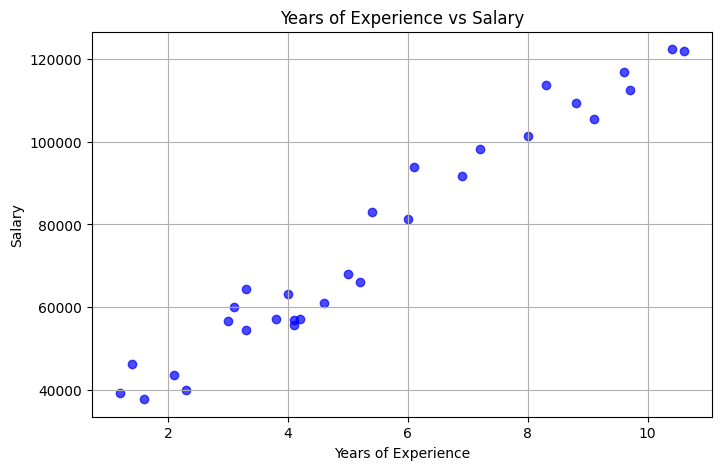

In [6]:
# '''Step 5. Data Visualization. Visualize the relationship between years of experience and salary '''

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(data['YearsExperience'], data['Salary'], color='blue', alpha=0.7)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


In [7]:
# '''Step 6. Prepare data for modelling '''
from sklearn.model_selection import train_test_split

X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# '''Step 7. Build the linear regression model'''
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# '''Step 8. Make prediction '''

y_pred = model.predict(X_test)

In [10]:
# '''Step 9. Evaluate the model performance '''
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error (MSE): 49830096.86
R-squared Score: 0.90


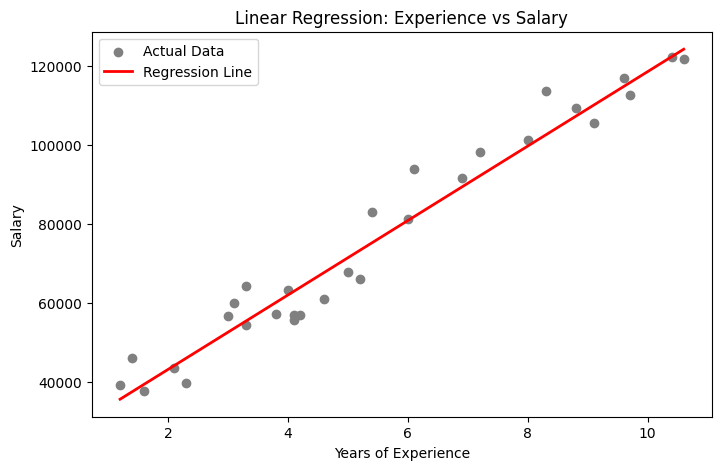

In [11]:
# '''Step 10. Visualize regression line'''

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression: Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [14]:
# '''Step 11. Predict new salary '''
import pandas as pd

new_experience = pd.DataFrame({'YearsExperience': [5]})
predicted_salary = model.predict(new_experience)
print(f"Predicted Salary for 5 years of experience: ${predicted_salary[0]:.2f}")


Predicted Salary for 5 years of experience: $71499.28


In [15]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
